<a href="https://colab.research.google.com/github/vvrgit/NLP-LAB/blob/main/Assignment4_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [11]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
import pandas as pd

df = pd.read_csv('/content/Tweets.csv')
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['clean_text'] = df['text'].apply(preprocess_text)
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [17]:
positive_reviews = df[df['airline_sentiment'] == 'positive']['clean_text']
negative_reviews = df[df['airline_sentiment'] == 'negative']['clean_text']
neutral_reviews = df[df['airline_sentiment'] == 'neutral']['clean_text']

In [18]:
tfidf_pos = TfidfVectorizer(max_features=5000)
tfidf_neg = TfidfVectorizer(max_features=5000)
tfidf_neu = TfidfVectorizer(max_features=5000)

tfidf_pos_matrix = tfidf_pos.fit_transform(positive_reviews)
tfidf_neg_matrix = tfidf_neg.fit_transform(negative_reviews)
tfidf_neu_matrix = tfidf_neu.fit_transform(neutral_reviews)

TfidfVectorizer(max_features=5000) initializes a TF-IDF vectorizer that converts text into numerical feature vectors by computing term frequency and inverse document frequency, while restricting the vocabulary to the top 5000 most informative terms to reduce dimensionality.

Limits the vocabulary size to the top 5000 words based on TF-IDF importance.

**Why this is needed:**

Reduces dimensionality
Saves memory
Improves model training speed
Removes very rare or unimportant words

**TfidfVectorizer is a Scikit-learn class that:**

Tokenizes text
Builds vocabulary
Computes TF-IDF scores
Converts text into a numerical matrix



In [19]:
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=15):
    scores = tfidf_matrix.mean(axis=0).A1
    words_scores = list(zip(feature_names, scores))
    sorted_words = sorted(words_scores, key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]

This function finds the most important words in a corpus based on their average TF-IDF score across all documents.

Parameter	Meaning
tfidf_matrix	TF-IDF matrix (documents × words)
feature_names	List of words (vocabulary)
top_n	Number of top words to return (default = 15)



In [20]:
top_pos_words = get_top_tfidf_words(tfidf_pos_matrix, tfidf_pos.get_feature_names_out())
top_neg_words = get_top_tfidf_words(tfidf_neg_matrix, tfidf_neg.get_feature_names_out())
top_neu_words = get_top_tfidf_words(tfidf_neu_matrix, tfidf_neu.get_feature_names_out())

print("Top 15 Positive Review Words:")
print(top_pos_words)

print("\nTop 15 Negative Review Words:")
print(top_neg_words)

print("\nTop 15 neutral Review Words:")
print(top_neu_words)

Top 15 Positive Review Words:
[('thanks', np.float64(0.05696633826134847)), ('thank', np.float64(0.05386621652248281)), ('jetblue', np.float64(0.04869712789944682)), ('united', np.float64(0.045288363754295916)), ('southwestair', np.float64(0.04317402063605669)), ('americanair', np.float64(0.03617058250551927)), ('usairways', np.float64(0.030573591237970786)), ('flight', np.float64(0.02627648747639356)), ('great', np.float64(0.023110255988112692)), ('virginamerica', np.float64(0.01686986093317449)), ('much', np.float64(0.014862916297842737)), ('service', np.float64(0.01445212700835853)), ('love', np.float64(0.013686750476213542)), ('awesome', np.float64(0.013103658725326935)), ('guys', np.float64(0.012976864425691187))]

Top 15 Negative Review Words:
[('flight', np.float64(0.04090188532027227)), ('united', np.float64(0.04060577821327643)), ('usairways', np.float64(0.03621075883855651)), ('americanair', np.float64(0.03312934893591102)), ('southwestair', np.float64(0.023372857902274346)),

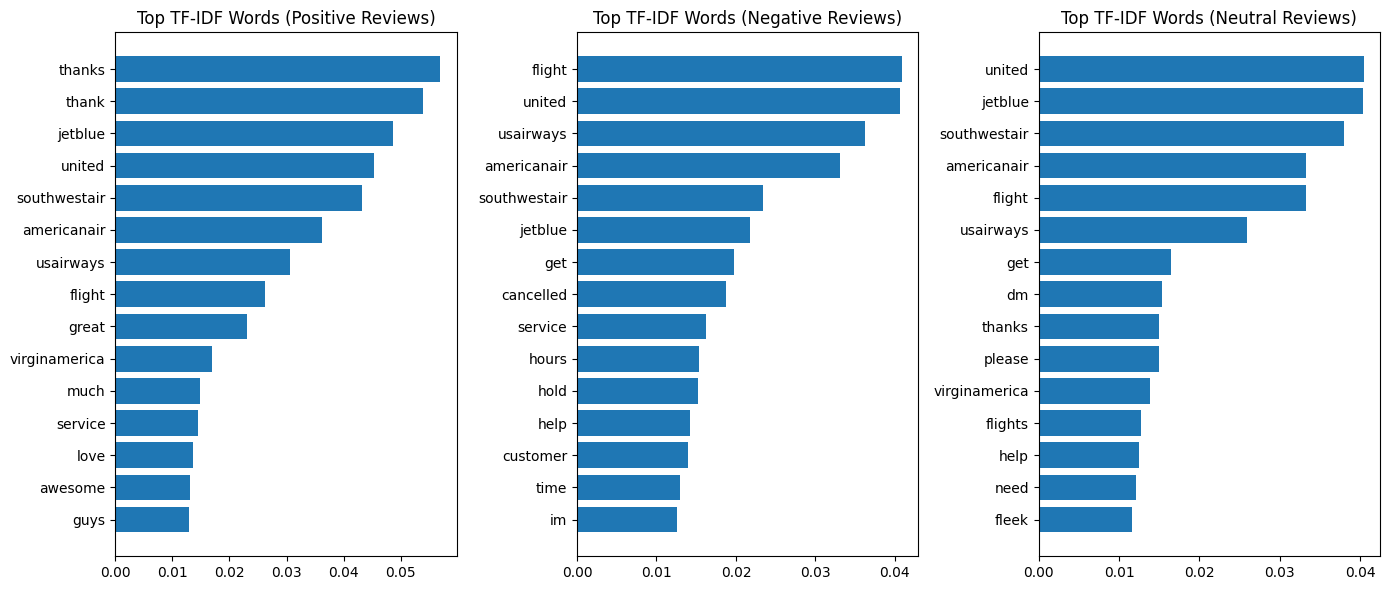

In [21]:
pos_words, pos_scores = zip(*top_pos_words)
neg_words, neg_scores = zip(*top_neg_words)
neu_words, neu_scores = zip(*top_neu_words)

plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.barh(pos_words, pos_scores)
plt.title('Top TF-IDF Words (Positive Reviews)')
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
plt.barh(neg_words, neg_scores)
plt.title('Top TF-IDF Words (Negative Reviews)')
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
plt.barh(neu_words, neu_scores)
plt.title('Top TF-IDF Words (Neutral Reviews)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


## Notebook Summary

This notebook performs text analysis on a dataset of airline tweets to identify key terms associated with positive, negative, and neutral sentiments. The process involves data loading, text preprocessing, TF-IDF vectorization, and visualization of the most important words for each sentiment category.

### 1. Data Loading and Initial Setup

First, essential libraries like `pandas`, `nltk`, `re`, `matplotlib`, and `sklearn` were imported. The `Tweets.csv` dataset was loaded into a pandas DataFrame, and the first few rows were displayed to inspect its structure.

### 2. Text Preprocessing

A `preprocess_text` function was defined to clean the tweet text. This function performs the following operations:
- Converts text to lowercase.
- Removes HTML tags.
- Removes punctuation and numbers.
- Tokenizes the text into individual words.
- Removes common English stopwords.

This function was then applied to the 'text' column of the DataFrame, creating a new 'clean_text' column containing the processed tweets.

### 3. Sentiment-Based Data Splitting

The DataFrame was split into three separate Series based on the `airline_sentiment` column: `positive_reviews`, `negative_reviews`, and `neutral_reviews`. This allows for sentiment-specific analysis.

### 4. TF-IDF Vectorization

Separate `TfidfVectorizer` instances were created and fitted for each sentiment category (positive, negative, neutral) to convert the cleaned text into TF-IDF (Term Frequency-Inverse Document Frequency) matrices. This technique highlights words that are important to a specific document within a collection of documents.

### 5. Identifying Top TF-IDF Words

A helper function `get_top_tfidf_words` was created to extract the top N words based on their average TF-IDF scores within each sentiment category. The top 15 words for positive, negative, and neutral reviews were then printed.

### 6. Visualization of Top Words

Finally, horizontal bar plots were generated to visually represent the top 15 TF-IDF words for each sentiment category. This provides a clear overview of the most distinctive terms used in positive, negative, and neutral airline tweets.